# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [7]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [10]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [11]:
print("df_hh_income: ", df_hh_income.shape)
print("df_pct_poverty: ", df_pct_poverty.shape)
print("df_pct_completed_hs: ", df_pct_completed_hs.shape)
print("df_share_race_city: ", df_share_race_city.shape)
print("df_fatalities: ", df_fatalities.shape)

df_hh_income:  (29322, 3)
df_pct_poverty:  (29329, 3)
df_pct_completed_hs:  (29329, 3)
df_share_race_city:  (29268, 7)
df_fatalities:  (2535, 14)


In [12]:
print("df_hh_income: ", df_hh_income.columns)
print("df_pct_poverty: ", df_pct_poverty.columns)
print("df_pct_completed_hs: ", df_pct_completed_hs.columns)
print("df_share_race_city: ", df_share_race_city.columns)
print("df_fatalities: ", df_fatalities.columns)

df_hh_income:  Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
df_pct_poverty:  Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
df_pct_completed_hs:  Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
df_share_race_city:  Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
df_fatalities:  Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [13]:
print("Na value counts: ")

print("df_hh_income: ", df_hh_income.any().isna().sum())
print("df_pct_poverty: ", df_pct_poverty.any().isna().sum())
print("df_pct_completed_hs: ", df_pct_completed_hs.any().isna().sum())
print("df_share_race_city: ", df_share_race_city.any().isna().sum())
print("df_fatalities: ", df_fatalities.any().isna().sum())

Na value counts: 
df_hh_income:  0
df_pct_poverty:  0
df_pct_completed_hs:  0
df_share_race_city:  0
df_fatalities:  0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [14]:
# Checking for missing values in df_hh_income
print("Missing values in df_hh_income:")
print(df_hh_income.isnull().sum())

# Checking for missing values in df_pct_poverty
print("\nMissing values in df_pct_poverty:")
print(df_pct_poverty.isnull().sum())

# Checking for missing values in df_pct_completed_hs
print("\nMissing values in df_pct_completed_hs:")
print(df_pct_completed_hs.isnull().sum())

# Checking for missing values in df_share_race_city
print("\nMissing values in df_share_race_city:")
print(df_share_race_city.isnull().sum())

# Checking for missing values in df_fatalities
print("\nMissing values in df_fatalities:")
print(df_fatalities.isnull().sum())

Missing values in df_hh_income:
Geographic Area     0
City                0
Median Income      51
dtype: int64

Missing values in df_pct_poverty:
Geographic Area    0
City               0
poverty_rate       0
dtype: int64

Missing values in df_pct_completed_hs:
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

Missing values in df_share_race_city:
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

Missing values in df_fatalities:
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0


In [15]:
# Removing duplicates in each DataFrame
df_hh_income = df_hh_income.drop_duplicates()
df_pct_poverty = df_pct_poverty.drop_duplicates()
df_pct_completed_hs = df_pct_completed_hs.drop_duplicates()
df_share_race_city = df_share_race_city.drop_duplicates()
df_fatalities = df_fatalities.drop_duplicates()


#### df_hh_income

In [16]:
# Check the data type of 'Median Income'
print(df_hh_income['Median Income'].dtype)

# Convert 'Median Income' to numeric
df_hh_income['Median Income'] = pd.to_numeric(df_hh_income['Median Income'], errors='coerce')

# Fill missing values with the mean
df_hh_income['Median Income'].fillna(df_hh_income['Median Income'].mean(), inplace=True)

# Check the data type of 'Median Income'
print(df_hh_income['Median Income'].dtype)


object
float64


#### df_fatalities

In [17]:
# For 'armed' column, replace missing values with a specific category like 'Unknown'
df_fatalities['armed'].fillna('Unknown', inplace=True)

# For 'age' column, replace missing values with the median age
df_fatalities['age'].fillna(df_fatalities['age'].median(), inplace=True)

# For 'race' column, replace missing values with a specific category like 'Unknown'
df_fatalities['race'].fillna('Unknown', inplace=True)

# For 'flee' column, you might replace missing values with "Other"
df_fatalities['flee'].fillna('Other', inplace=True)


#### Again checking for missing values 

In [18]:
# Checking for missing values in df_hh_income
print("Missing values in df_hh_income:")
print(df_hh_income.isnull().sum())

# Checking for missing values in df_pct_poverty
print("\nMissing values in df_pct_poverty:")
print(df_pct_poverty.isnull().sum())

# Checking for missing values in df_pct_completed_hs
print("\nMissing values in df_pct_completed_hs:")
print(df_pct_completed_hs.isnull().sum())

# Checking for missing values in df_share_race_city
print("\nMissing values in df_share_race_city:")
print(df_share_race_city.isnull().sum())

# Checking for missing values in df_fatalities
print("\nMissing values in df_fatalities:")
print(df_fatalities.isnull().sum())

Missing values in df_hh_income:
Geographic Area    0
City               0
Median Income      0
dtype: int64

Missing values in df_pct_poverty:
Geographic Area    0
City               0
poverty_rate       0
dtype: int64

Missing values in df_pct_completed_hs:
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

Missing values in df_share_race_city:
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

Missing values in df_fatalities:
id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [19]:
# some rows have "-" as values, which are not numeric, so we need to remove them
df_pct_poverty = df_pct_poverty[df_pct_poverty['poverty_rate'] != '-']
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])

In [20]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29128 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29128 non-null  object 
 1   City             29128 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 910.2+ KB


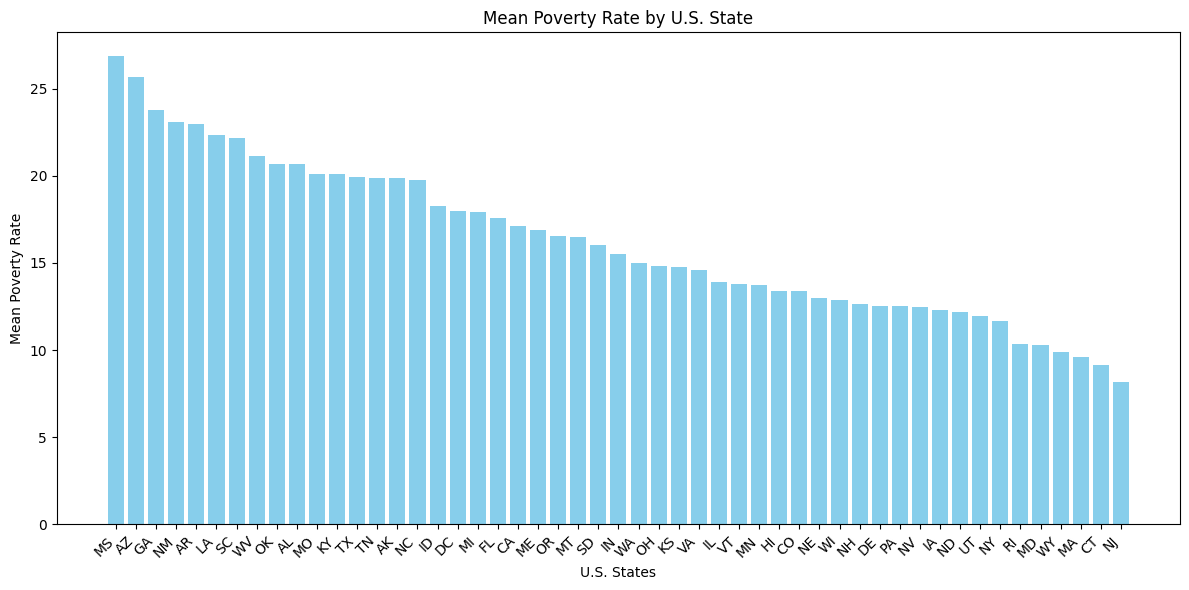

In [21]:
import matplotlib.pyplot as plt

# Let's group by state and calculate the mean poverty rate for each state
state_poverty_mean = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()

# Sorting the data by poverty rate for better visualization
state_poverty_mean = state_poverty_mean.sort_values(by='poverty_rate', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(state_poverty_mean['Geographic Area'], state_poverty_mean['poverty_rate'], color='skyblue')
plt.xlabel('U.S. States')
plt.ylabel('Mean Poverty Rate')
plt.title('Mean Poverty Rate by U.S. State')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()

# Display the plot
plt.show()


In [22]:
# Identify the state with the highest and lowest poverty rates
highest_poverty_state = state_poverty_mean.iloc[0]['Geographic Area']
lowest_poverty_state = state_poverty_mean.iloc[-1]['Geographic Area']

print(f"Highest poverty rate: {highest_poverty_state}")
print(f"Lowest poverty rate: {lowest_poverty_state}")

Highest poverty rate: MS
Lowest poverty rate: NJ


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

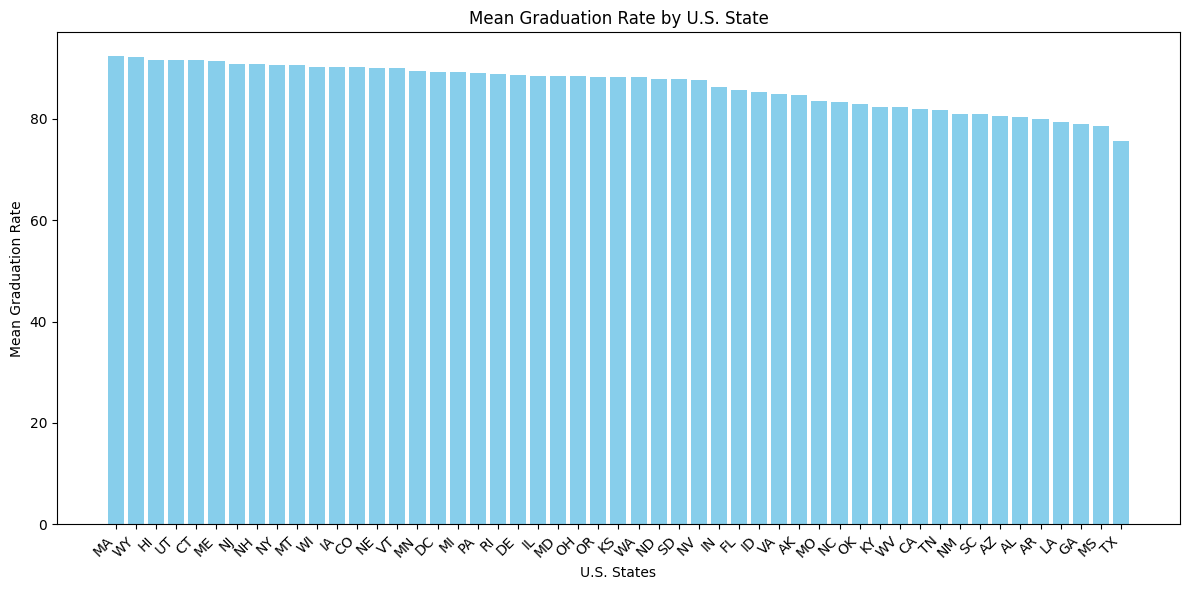

Highest Graduation rate: MA
Lowest Graduation rate: TX


In [23]:
# some rows have "-" as values, which are not numeric, so we need to remove them
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs'] != '-']
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])

# Let's group by state and calculate the mean graduation rate for each state
state_graduation_mean = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

# Sorting the data by poverty rate for better visualization
state_graduation_mean = state_graduation_mean.sort_values(by='percent_completed_hs', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(state_graduation_mean['Geographic Area'], state_graduation_mean['percent_completed_hs'], color='skyblue')
plt.xlabel('U.S. States')
plt.ylabel('Mean Graduation Rate')
plt.title('Mean Graduation Rate by U.S. State')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()

# Display the plot
plt.show()

# Identify the state with the highest and lowest gaduation rates
highest_graduation_state = state_graduation_mean.iloc[0]['Geographic Area']
lowest_graduation_state = state_graduation_mean.iloc[-1]['Geographic Area']


print(f"Highest Graduation rate: {highest_graduation_state}")
print(f"Lowest Graduation rate: {lowest_graduation_state}")

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [24]:
# Merge the two dataframes on 'Geographic Area'
merged_df = pd.merge(state_poverty_mean, state_graduation_mean, on=['Geographic Area'], how='inner')

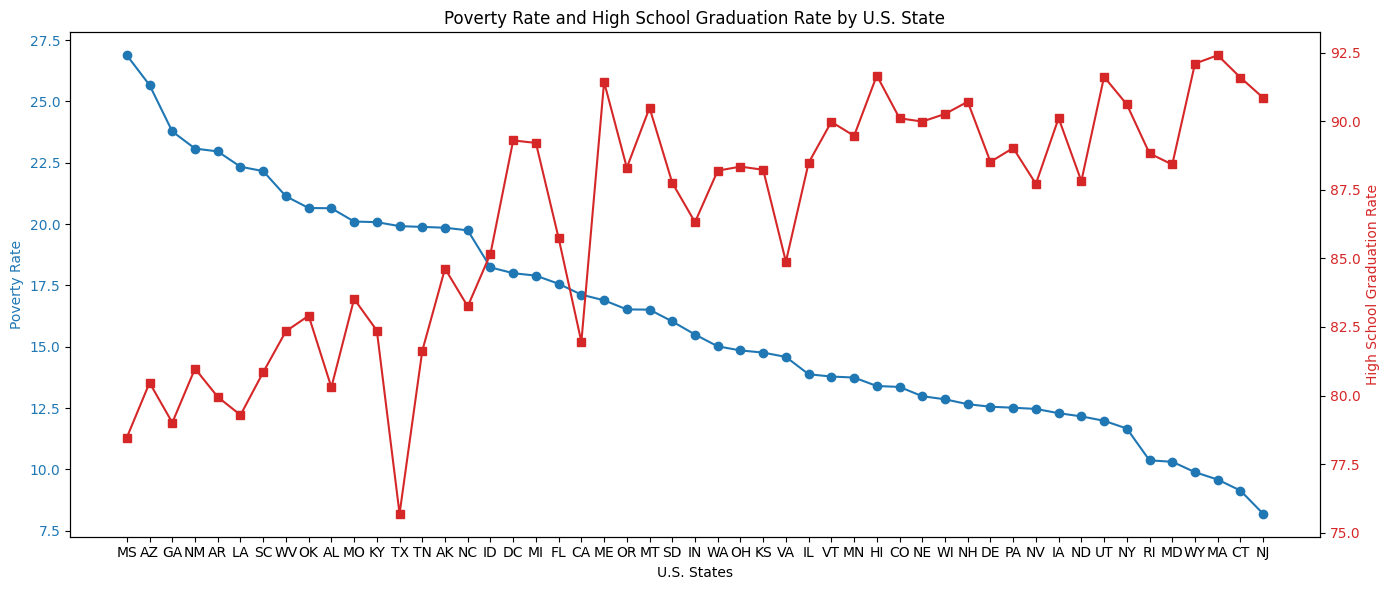

In [25]:
# Plotting the line chart with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plotting poverty rate on the first y-axis (left)
color = 'tab:blue'
ax1.set_xlabel('U.S. States')
ax1.set_ylabel('Poverty Rate', color=color)
ax1.plot(merged_df['Geographic Area'], merged_df['poverty_rate'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Creating the second y-axis (right) for high school graduation rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('High School Graduation Rate', color=color)
ax2.plot(merged_df['Geographic Area'], merged_df['percent_completed_hs'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

# Title and formatting
plt.title('Poverty Rate and High School Graduation Rate by U.S. State')
plt.xticks(rotation=45, ha='right')  # Rotate state names for better readability
plt.tight_layout()

# Display the plot
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

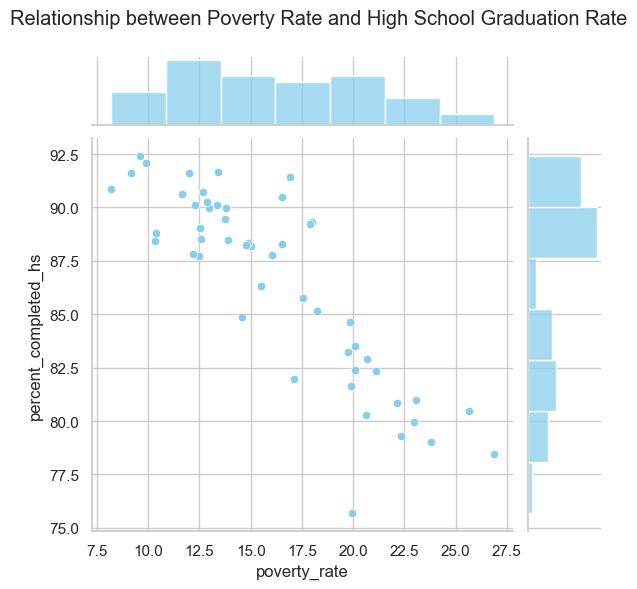

In [26]:
import seaborn as sns

# Using Seaborn jointplot with scatter plot and KDE
sns.set(style="whitegrid")
g = sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=merged_df, kind='scatter', color='skyblue')

# Title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Poverty Rate and High School Graduation Rate')

# Display the plot
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

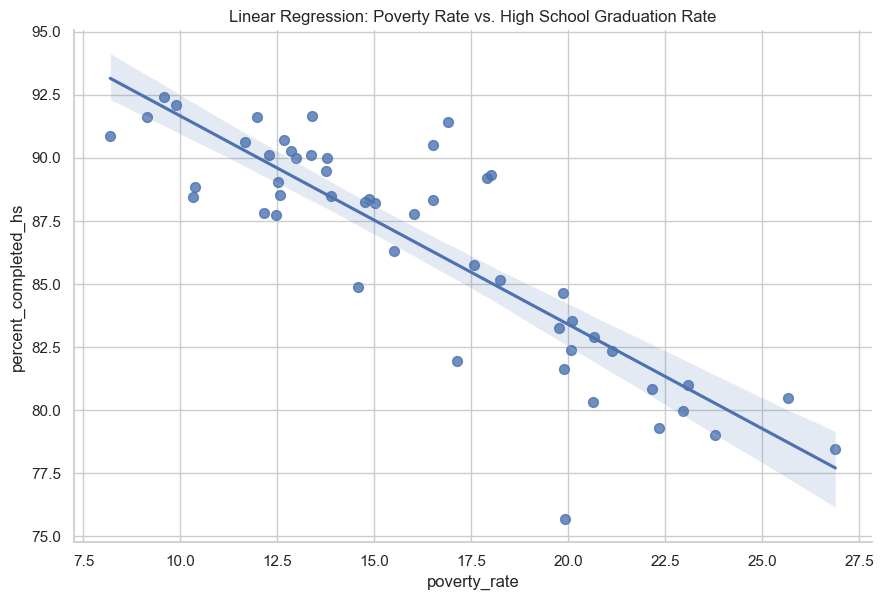

In [27]:
# Using Seaborn lmplot for linear regression
sns.set(style="whitegrid")
g = sns.lmplot(x='poverty_rate', y='percent_completed_hs', data=merged_df, height=6, aspect=1.5, scatter_kws={'s': 50})

# Title
plt.title('Linear Regression: Poverty Rate vs. High School Graduation Rate')

# Display the plot
plt.show()

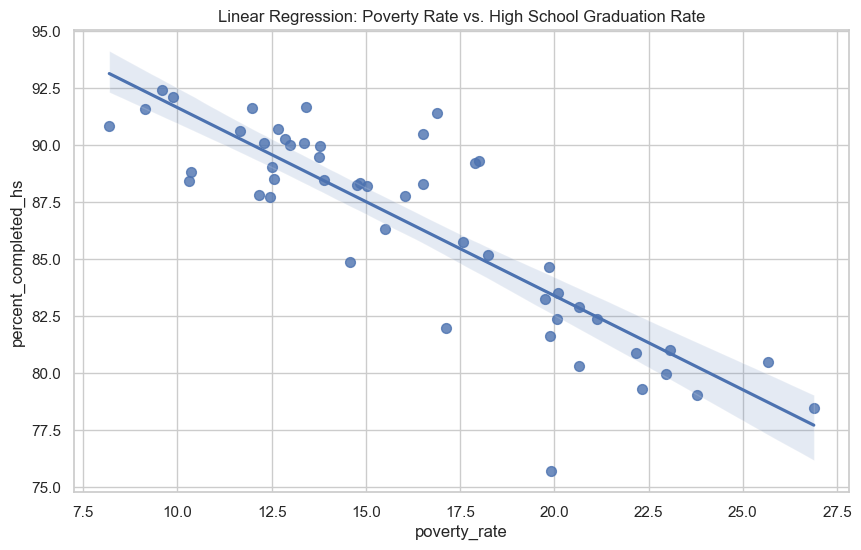

In [28]:
# Using Seaborn regplot for linear regression
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='poverty_rate', y='percent_completed_hs', data=merged_df, scatter_kws={'s': 50})

# Title
plt.title('Linear Regression: Poverty Rate vs. High School Graduation Rate')

# Display the plot
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [29]:
# convert the data type of race shared pct to numeric
columns_to_convert = df_share_race_city.columns[2:]
df_share_race_city[columns_to_convert] = df_share_race_city[columns_to_convert].apply(pd.to_numeric, errors='coerce')

df_share_race_city.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


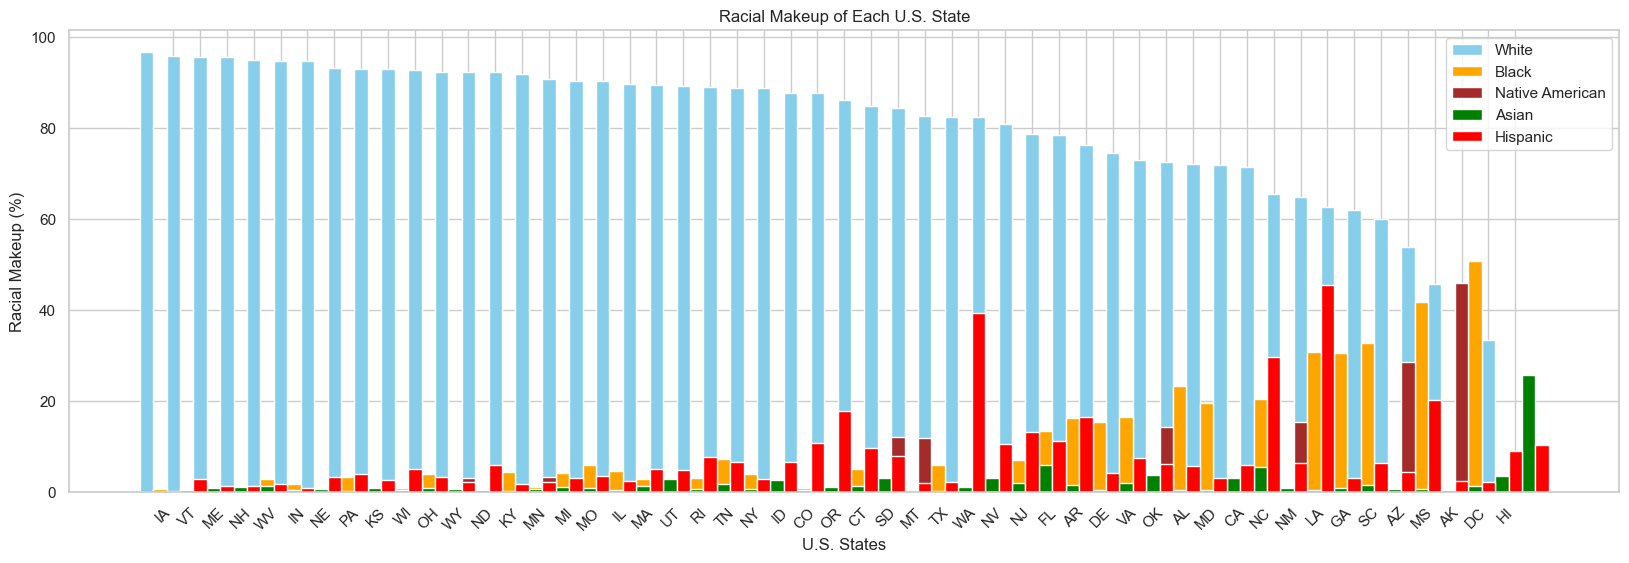

In [30]:
# Grouping by state and calculating mean shares
state_race_mean = df_share_race_city.groupby('Geographic area')[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].mean().reset_index()

# Sorting the data for better visualization
state_race_mean = state_race_mean.sort_values(by='share_white', ascending=False)

# Plotting the grouped bar chart
bar_width = 0.5
index = np.arange(len(state_race_mean))

plt.figure(figsize=(20, 6))

# White population
plt.bar(index - 2 * bar_width, state_race_mean['share_white'], width=bar_width, label='White', color='skyblue')

# Black population
plt.bar(index - bar_width, state_race_mean['share_black'], width=bar_width, label='Black', color='orange')

# Native American population
plt.bar(index, state_race_mean['share_native_american'], width=bar_width, label='Native American', color='brown')

# Asian population
plt.bar(index + bar_width, state_race_mean['share_asian'], width=bar_width, label='Asian', color='green')

# Hispanic population
plt.bar(index + 2 * bar_width, state_race_mean['share_hispanic'], width=bar_width, label='Hispanic', color='red')

# Adding labels and title
plt.xlabel('U.S. States')
plt.ylabel('Racial Makeup (%)')
plt.title('Racial Makeup of Each U.S. State')
plt.xticks(index, state_race_mean['Geographic area'], rotation=45, ha='right')
plt.legend()

# Display the plot
plt.show()


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [31]:
# Counting the number of fatalities by race
fatalities_by_race = df_fatalities['race'].value_counts()

In [32]:
fatalities_by_race

race
W          1201
B           618
H           423
Unknown     195
A            39
N            31
O            28
Name: count, dtype: int64

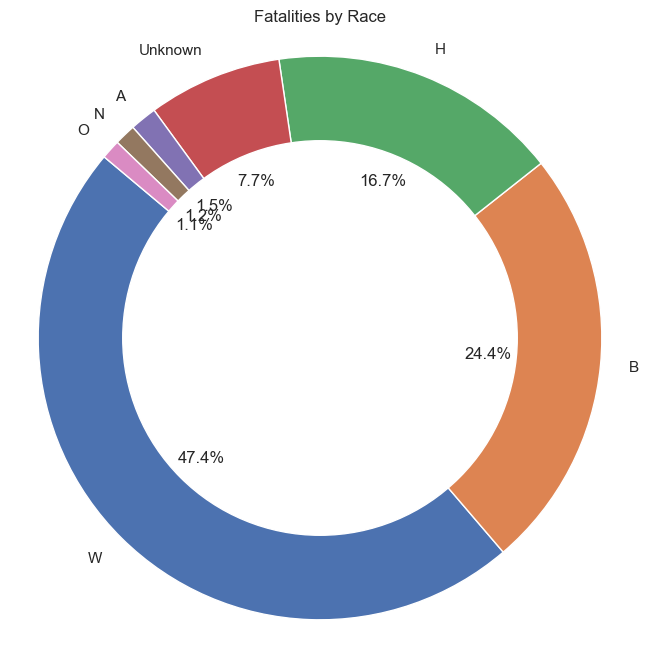

In [33]:
# Plotting the donut chart
plt.figure(figsize=(8, 8))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = fatalities_by_race.index
sizes = fatalities_by_race.values

# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Adding a circle in the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adding a title
plt.title('Fatalities by Race')

# Display the plot
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [34]:
# Counting the number of deaths by gender
deaths_by_gender = df_fatalities['gender'].value_counts()

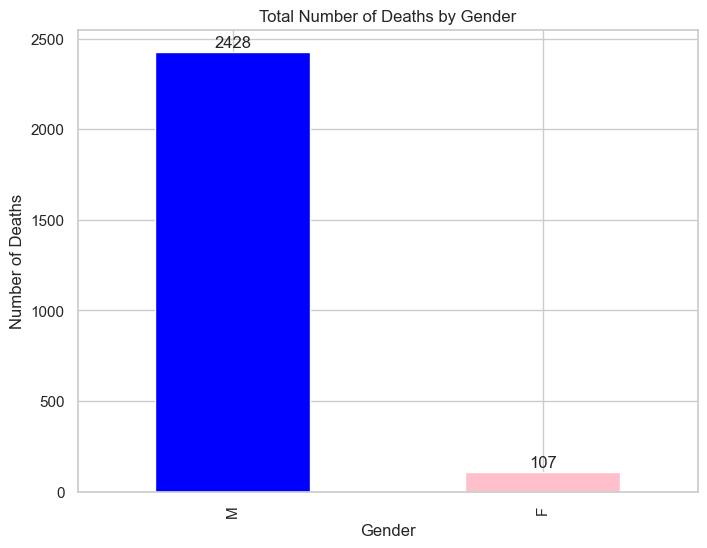

In [35]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))

# Bar chart
deaths_by_gender.plot(kind='bar', color=['blue', 'pink'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.title('Total Number of Deaths by Gender')

# Adding data labels on top of the bars
for index, value in enumerate(deaths_by_gender):
    plt.text(index, value + 10, str(value), ha='center', va='bottom')

# Display the plot
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [36]:
manner_of_death = df_fatalities[['manner_of_death', 'gender']].groupby('gender')['manner_of_death'].value_counts()
# Pivot the DataFrame for better plotting
manner_of_death_pivot = manner_of_death.unstack()

<Figure size 1000x600 with 0 Axes>

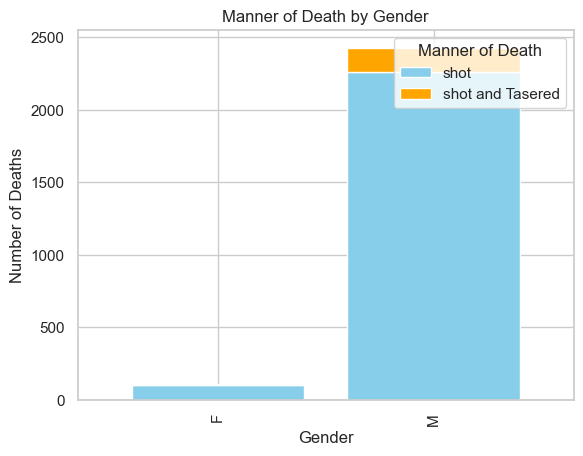

In [37]:
# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))

# Bar chart
manner_of_death_pivot.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], width=0.8)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.title('Manner of Death by Gender')

# Adding a legend
plt.legend(title='Manner of Death', loc='upper right')

# Display the plot
plt.show()

a notably higher total count of deaths (M: 2428, F: 107). The primary manner of death for both genders is "shot," with males predominantly affected (M: 2261 shot, 167 shot and Tasered; F: 102 shot, 5 shot and Tasered).

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [38]:
# Counting the number of armed and unarmed fatalities
armed_counts = df_fatalities['armed'].value_counts()

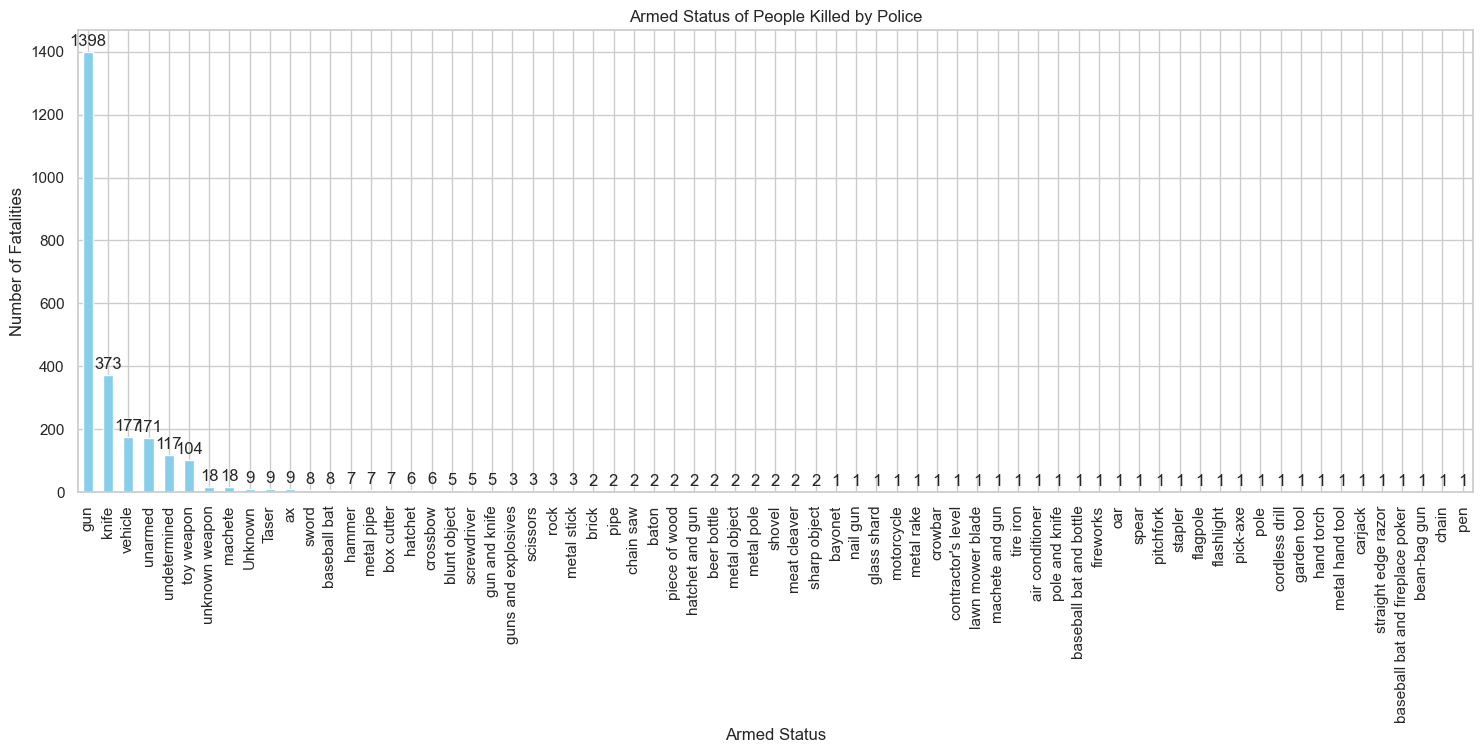

In [39]:
# Plotting the chart
plt.figure(figsize=(18, 6))

# Bar chart
armed_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Armed Status')
plt.ylabel('Number of Fatalities')
plt.title('Armed Status of People Killed by Police')

# Adding data labels on top of the bars
for index, value in enumerate(armed_counts):
    plt.text(index, value + 10, str(value), ha='center', va='bottom')

# Display the plot
plt.show()

In [40]:
print("Armed with gun: ", armed_counts['gun'])
print("Unarmed: ", armed_counts['unarmed'])

Armed with gun:  1398
Unarmed:  171


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [41]:
print("Percentage of people killed under the age of 25: ", df_fatalities[df_fatalities['age'] < 25].shape[0] / df_fatalities.shape[0] * 100, "%")

Percentage of people killed under the age of 25:  17.75147928994083 %


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

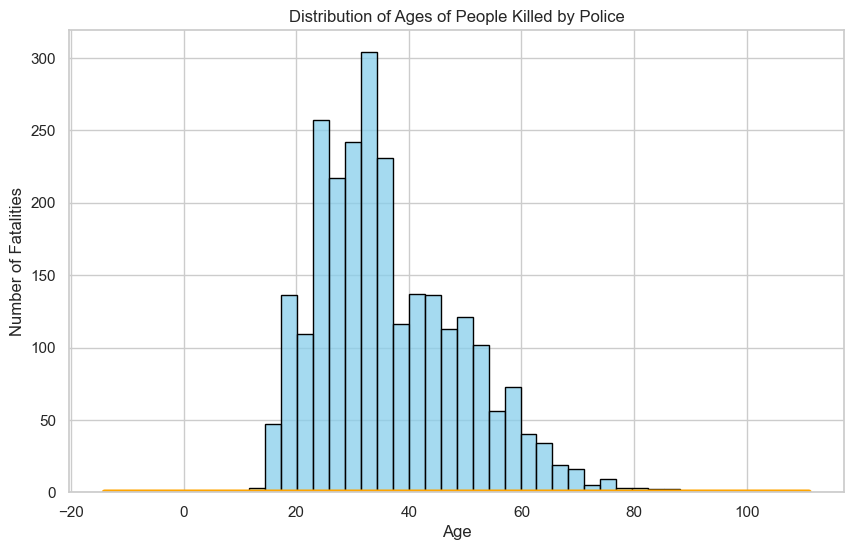

In [42]:
# Plotting the histogram and KDE plot
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(df_fatalities['age'], bins=30, kde=False, color='skyblue', edgecolor='black')

# KDE plot
sns.kdeplot(df_fatalities['age'], bw_adjust=2.5, color='orange', linewidth=4)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Number of Fatalities')
plt.title('Distribution of Ages of People Killed by Police')

# Display the plot
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

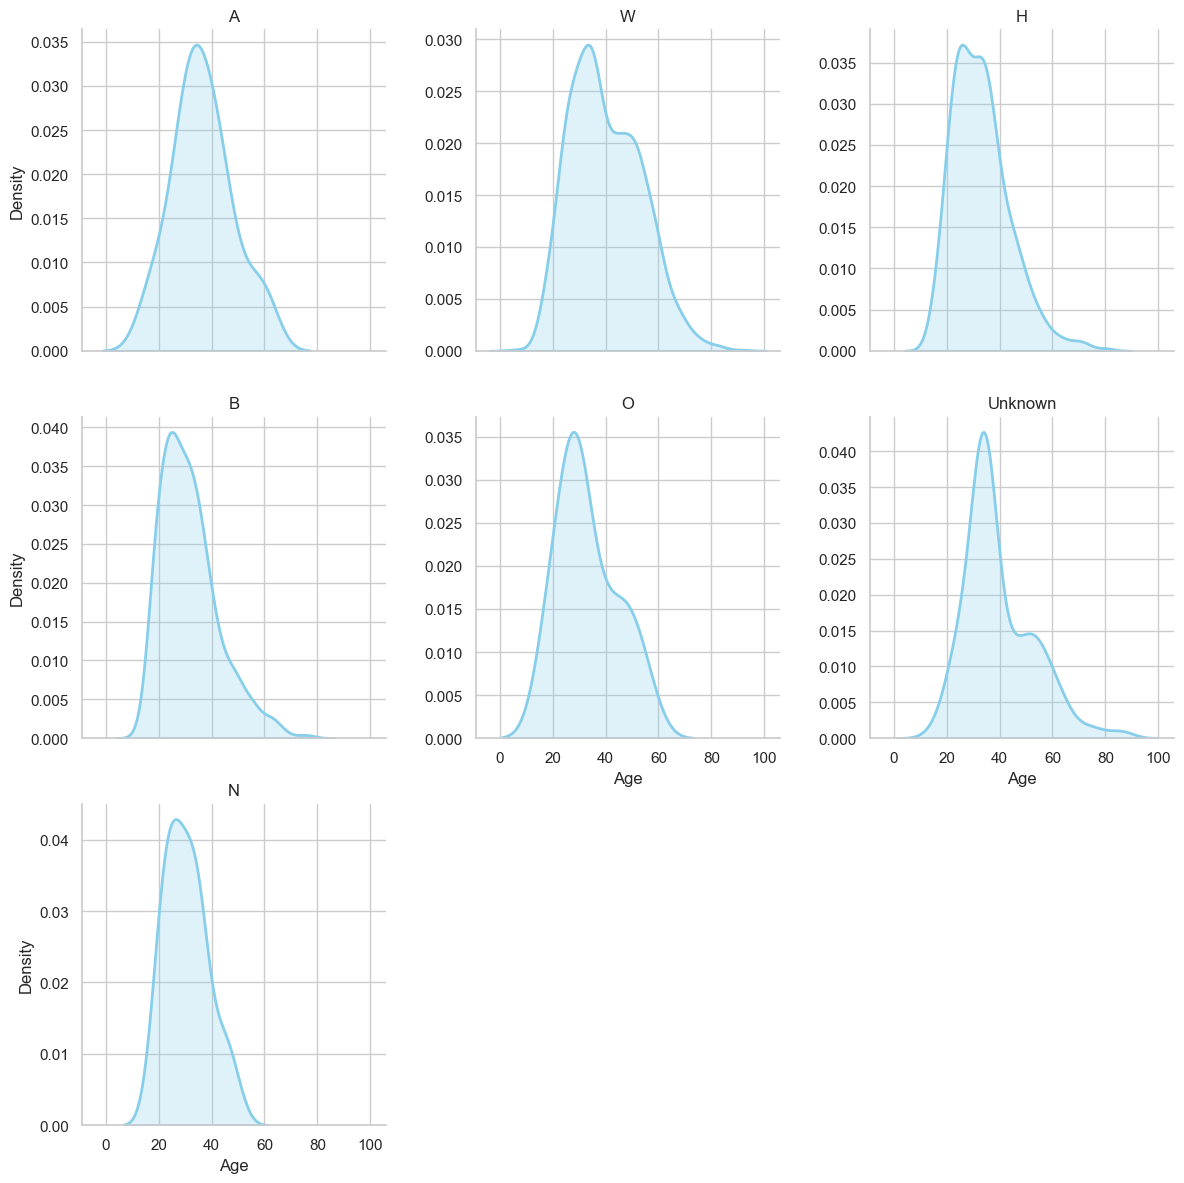

In [43]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a FacetGrid to separate KDE plots by race
g = sns.FacetGrid(df_fatalities, col="race", col_wrap=3, height=4, sharey=False)

# Map KDE plots onto the FacetGrid
g.map(sns.kdeplot, 'age', color='skyblue', linewidth=2, fill=True)

# Adjust the layout
g.set_axis_labels('Age', 'Density')
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

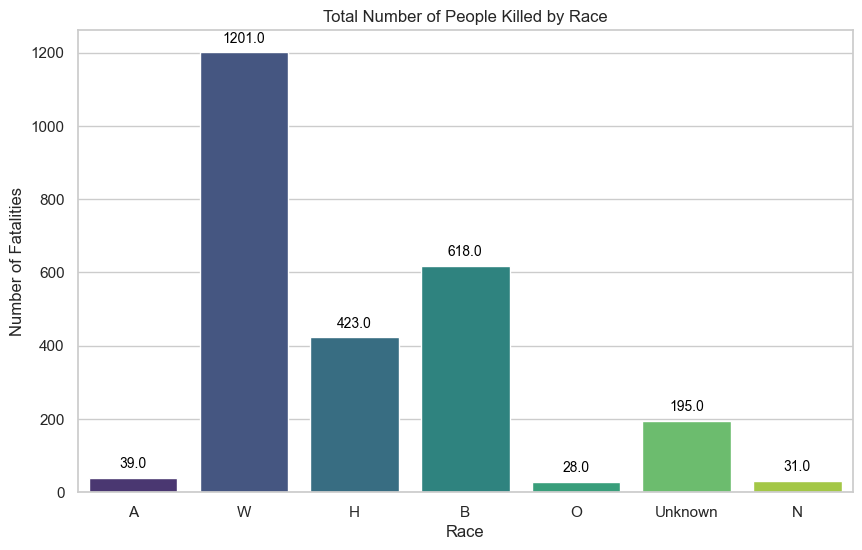

In [44]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='race', data=df_fatalities, palette='viridis', hue='race')

# Adding labels and title
plt.xlabel('Race')
plt.ylabel('Number of Fatalities')
plt.title('Total Number of People Killed by Race')

# Adding number of deaths as labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Show the plot
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [45]:
print("Percentage of people killed by police have been diagnosed with a mental illness: ", df_fatalities[df_fatalities['signs_of_mental_illness'] == True].shape[0] / df_fatalities.shape[0] * 100, "%")

Percentage of people killed by police have been diagnosed with a mental illness:  24.970414201183434 %


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [46]:
# Get the top 10 cities with the most police killings
top_cities = df_fatalities['city'].value_counts().nlargest(10)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12256\1358563688.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


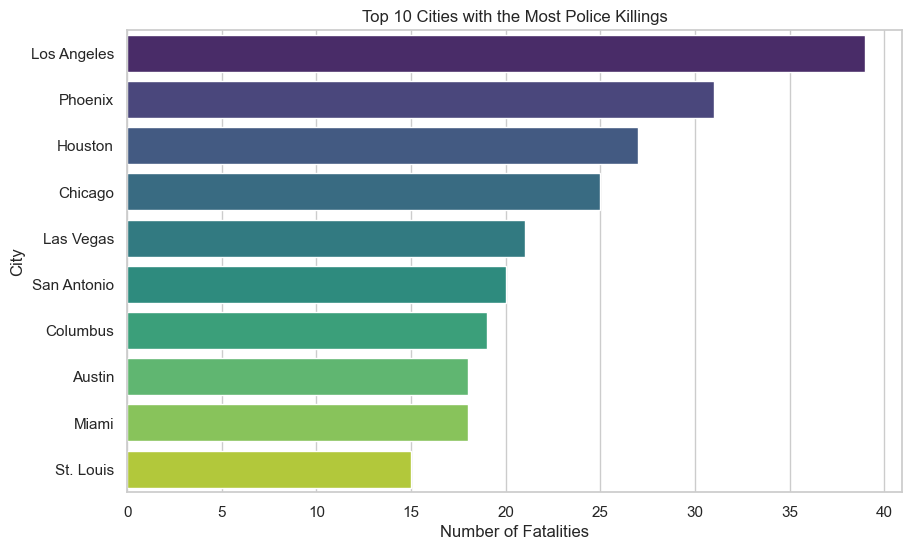

In [47]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')

# Adding labels and title
plt.xlabel('Number of Fatalities')
plt.ylabel('City')
plt.title('Top 10 Cities with the Most Police Killings')

# Show the plot
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [48]:
# Get the Top 10 Cities with the Most Police Killings:
top_cities = df_fatalities['city'].value_counts().nlargest(10).index
df_top_cities = df_fatalities[df_fatalities['city'].isin(top_cities)]


In [49]:
# Calculate the Share of Each Race for Each City:
df_race_share = df_top_cities.groupby(['city', 'race']).size().unstack(fill_value=0)
df_race_share = df_race_share.div(df_race_share.sum(axis=1), axis=0) * 100


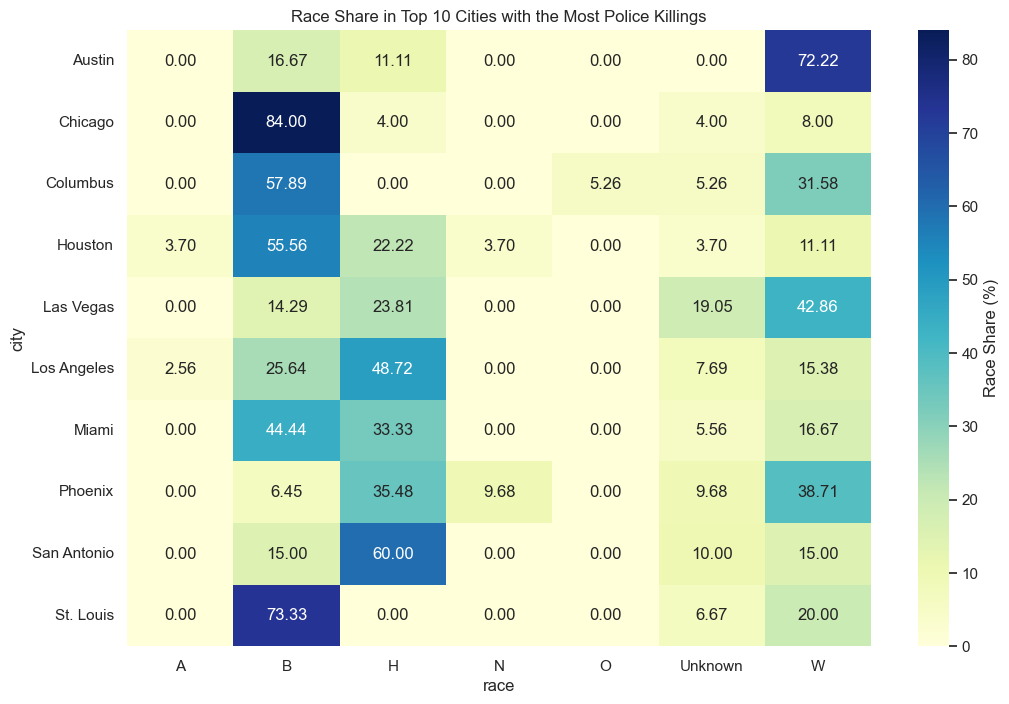

In [50]:
# Visualize the Race Share for Each City:
plt.figure(figsize=(12, 8))
sns.heatmap(df_race_share, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Race Share (%)'})
plt.title('Race Share in Top 10 Cities with the Most Police Killings')
plt.show()


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [87]:
import geopandas as gpd
import pyproj

# File path to the shapefile
fp = "C:\\Users\\Lenovo\\Desktop\\cb_2018_us_state_500k\\cb_2018_us_state_500k.shx"

states = gpd.read_file(fp)

# Load police killings data (replace 'state' with your actual column name)
killings_by_state = df_fatalities['state'].value_counts().reset_index()
killings_by_state.columns = ['state', 'killings']


In [93]:
killings_by_state.head()

,state,count
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79


In [94]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [95]:
# Merge with state shapefile using 'STATEFP' and 'state' columns
merged = states.merge(killings_by_state, how='left', left_on='STUSPS', right_on='state')


<Figure size 1500x1000 with 0 Axes>

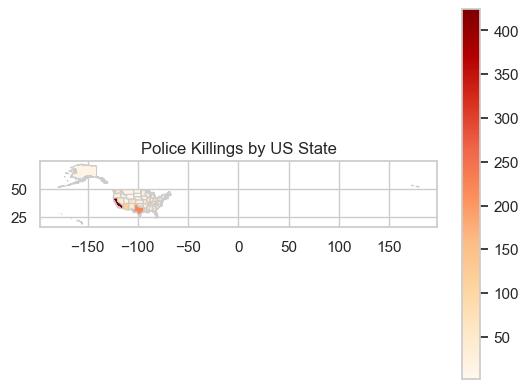

In [99]:

# Plot choropleth map
plt.figure(figsize=(15, 10))
merged.plot(column='count', cmap='OrRd', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('Police Killings by US State')
plt.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

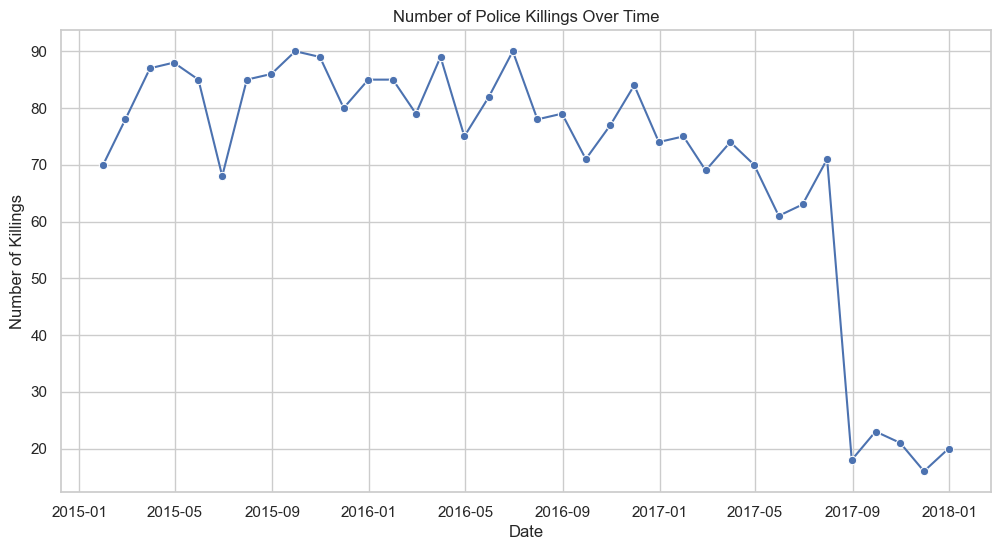

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'date' is the datetime column in your dataset
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%Y-%m-%d')

# Group by the date and count the number of killings on each day
killings_over_time = df_fatalities.resample('M', on='date').size()

# Plot the trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=killings_over_time.index, y=killings_over_time.values, marker='o', color='b')
plt.title('Number of Police Killings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Killings')
plt.show()


Killing over years

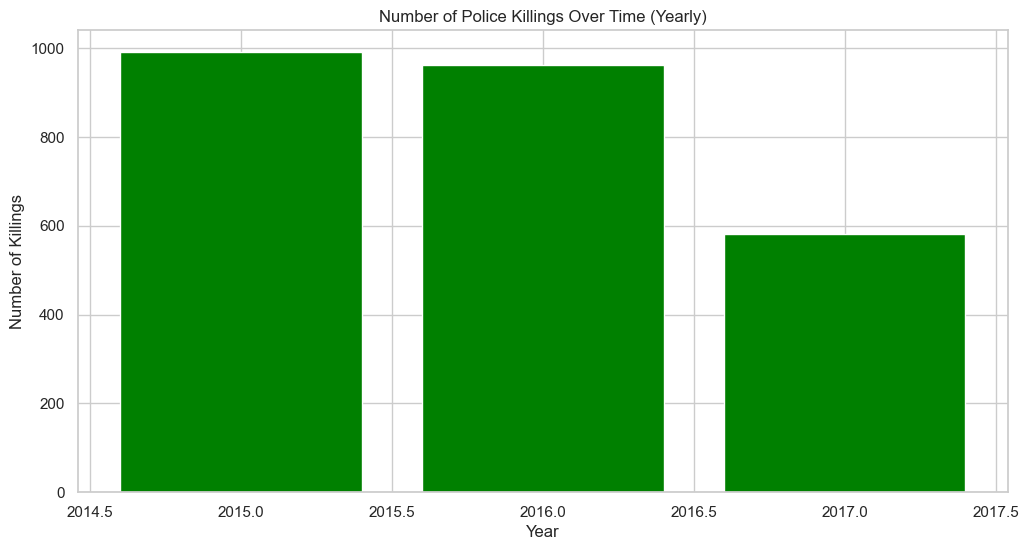

In [105]:
# Extract year from the date
df_fatalities['year'] = df_fatalities['date'].dt.year

# Group by year
killings_by_year = df_fatalities.groupby('year').size().reset_index(name='killings')

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(killings_by_year['year'], killings_by_year['killings'], color='green')
plt.title('Number of Police Killings Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Killings')
plt.show()


Area plot

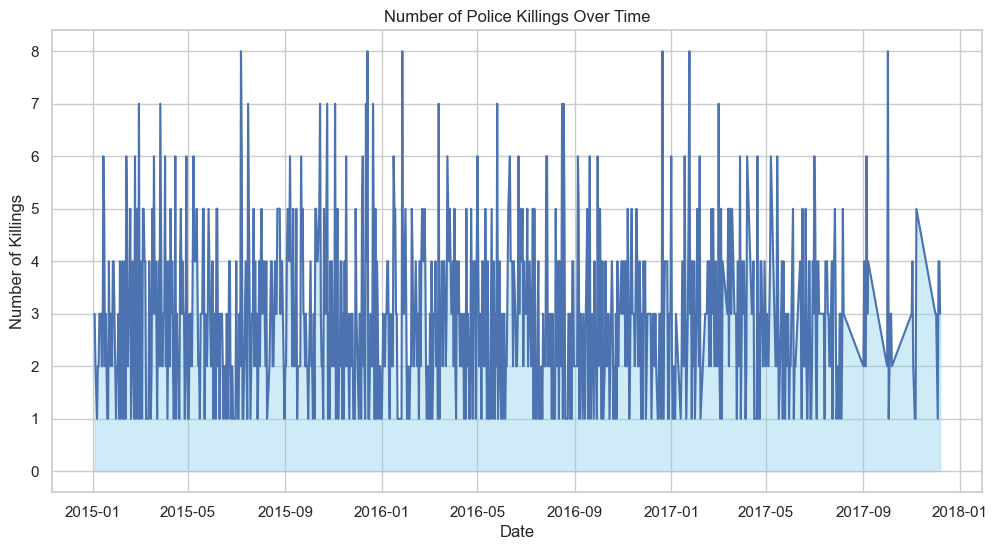

In [108]:
# Group by date and count the number of killings
killings_by_date = df_fatalities.groupby('date').size().reset_index(name='killings')

# Plotting
plt.figure(figsize=(12, 6))
plt.fill_between(killings_by_date['date'], killings_by_date['killings'], color='skyblue', alpha=0.4)
plt.plot(killings_by_date['date'], killings_by_date['killings'], marker='', linestyle='-', color='b')
plt.title('Number of Police Killings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Killings')
plt.grid(True)
plt.show()


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

## Epilogue: Understanding Police Killings in the United States

In exploring the dataset on police killings in the United States, we embarked on a journey to unravel the complex dynamics surrounding law enforcement interactions. Through a comprehensive analysis, we delved into various aspects, shedding light on critical factors that shape the narrative of police-involved fatalities.

### Overview of Key Findings:

1. **Demographic Patterns:**
   - We uncovered significant disparities in the demographics of individuals affected by police violence, with particular attention to race and ethnicity.
   - Black and Hispanic communities experienced a disproportionate number of fatalities, prompting a deeper examination of the underlying causes.

2. **Armed Encounters:**
   - The analysis of armed encounters revealed insights into the prevalence of weapons among those killed by the police.
   - Armed status varied, emphasizing the need for nuanced discussions around the use of force and law enforcement tactics.

3. **Age Distribution:**
   - Utilizing a histogram and kernel density estimation (KDE) plot, we visualized the age distribution of victims, offering a demographic perspective on police-involved fatalities.

4. **Racial Disparities:**
   - By creating a KDE plot for each racial group, we discerned potential differences in the distribution of ages among victims. This nuanced exploration contributes to a more comprehensive understanding of the data.

5. **Geospatial Analysis:**
   - Geospatial visualizations, including choropleth maps and city rankings, pinpointed regions where police killings were more prevalent. The identification of high-incidence areas raises questions about the factors contributing to these patterns.

6. **Temporal Trends:**
   - A temporal analysis exposed trends in police killings over time. Various charts illustrated the fluctuations in the number of incidents, prompting reflections on societal shifts, policy changes, and their impact on law enforcement dynamics.

### Call to Action:

While this analysis provides valuable insights, it is crucial to recognize that data alone cannot capture the full complexity of the issues surrounding police violence. Further interdisciplinary research, community engagement, and policy dialogues are essential for fostering understanding and implementing meaningful change.

The exploration of police killings serves as a call to action, urging society to collectively address systemic issues, promote transparency, and advocate for reforms that prioritize equity, justice, and the protection of human life.

In the pursuit of a more just and inclusive future, let this analysis serve as a starting point for informed conversations and collaborative efforts to create a society where the principles of fairness, accountability, and empathy guide our collective path forward.